In [26]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# input_path = './data/'
input_path = './Data/'

# output_path = './output/'
output_path = 'output'

In [28]:
def plot_images(imagesSet, title, figsize=(20, 10), cmap=None):
    plt.figure(figsize=figsize)
    plt.suptitle(title, fontsize=20)
    for i in range(len(imagesSet[0])):
        for j in range(len(imagesSet)):
            plt.subplot(len(imagesSet), len(imagesSet[0]), i + j*len(imagesSet[0]) + 1)
            plt.imshow(imagesSet[j][i], cmap=cmap)
            plt.axis('off')
        plt.tight_layout()

In [29]:
train_photo_paths = [input_path + 'train/image/' + x for x in os.listdir(input_path + 'train/image/')]
train_label_paths = [input_path + 'train/mask/' + x for x in os.listdir(input_path + 'train/mask/')]

In [30]:
train_raw_photos = [cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2GRAY)  for path in train_photo_paths]
train_masks = [cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2GRAY) for path in train_label_paths]
train_masks = [np.where(mask > 0, 255, 0) for mask in train_masks]

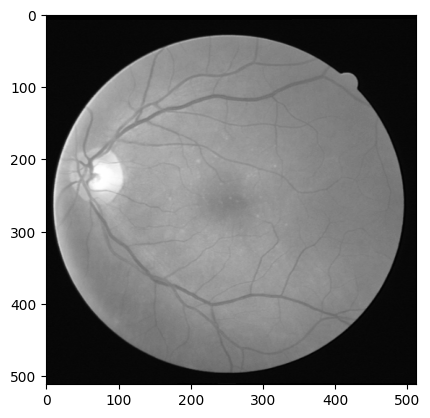

In [31]:
plt.imshow(train_raw_photos[0],cmap='gray')

In [32]:
train_photos_eq_sample = [cv2.equalizeHist(photo) for photo in train_raw_photos[:5]]


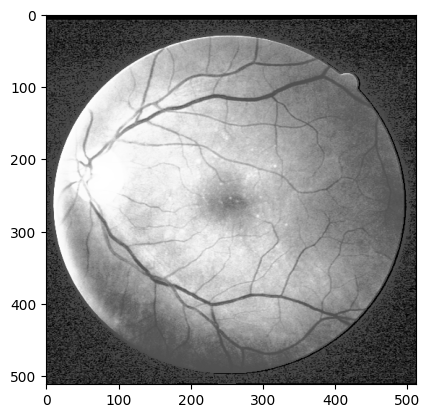

In [33]:
plt.imshow(train_photos_eq_sample[0],cmap='gray')

In [34]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
train_photos_clahe_sample = [clahe.apply(photo) for photo in train_raw_photos[:5]]

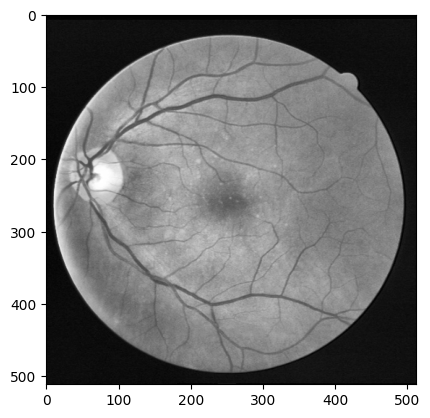

In [35]:
plt.imshow(train_photos_clahe_sample[0],cmap='gray')

In [36]:
train_photos_clahe =  [clahe.apply(photo) for photo in train_raw_photos]

In [37]:
train_photos = train_photos_clahe

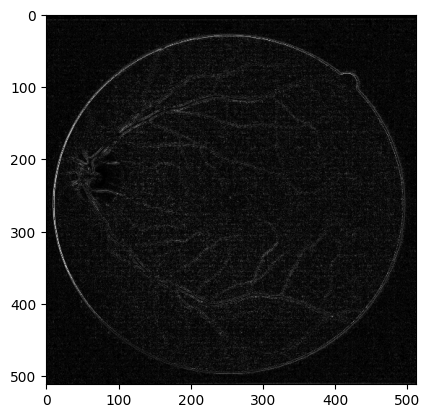

In [38]:
laplacian = cv2.Laplacian(train_photos[0], cv2.CV_64F)

# Convert the output to 8-bit grayscale
laplacian = np.uint8(np.absolute(laplacian))
plt.imshow(laplacian,cmap='gray')

In [39]:
Sobel_x = cv2.Sobel(train_photos[0], cv2.CV_64F, 1, 0, ksize=3)
Sobel_y = cv2.Sobel(train_photos[0], cv2.CV_64F, 0, 1, ksize=3)
Sobel = cv2.magnitude(Sobel_x, Sobel_y)

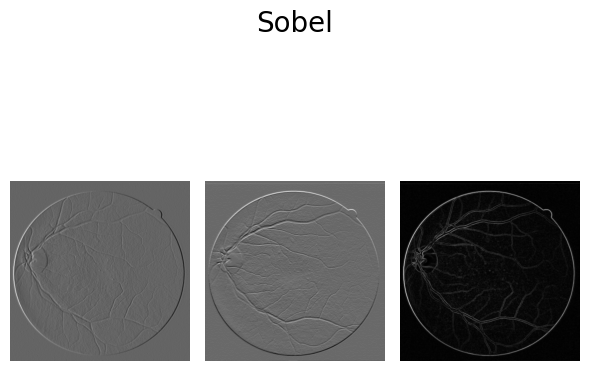

In [40]:
plot_images([[Sobel_x, Sobel_y, Sobel]], 'Sobel', figsize=(6,5 ), cmap='gray')

In [41]:
#apply sharr operator to all images
train_photos_Sobel_x = [cv2.Sobel(photo, cv2.CV_64F, 1, 0) for photo in train_photos]
train_photos_Sobel_y = [cv2.Sobel(photo, cv2.CV_64F, 0, 1) for photo in train_photos]
sobel_results = [cv2.magnitude(Sobel_x, Sobel_y) for Sobel_x, Sobel_y in zip(train_photos_Sobel_x, train_photos_Sobel_y)]

In [42]:
image=sobel_results[0]
def binarise(image):
    _, binary_image = cv2.threshold(image, 70, 100, cv2.THRESH_BINARY)
    return binary_image

In [43]:
binary_images=[binarise(image) for image in sobel_results]

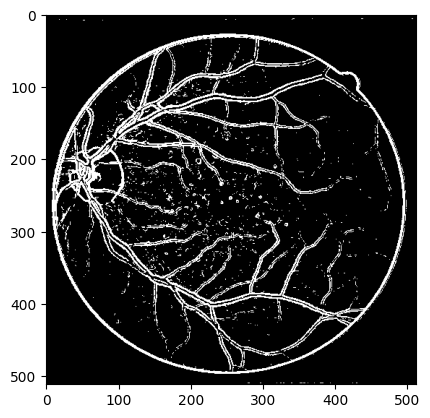

In [44]:
plt.imshow(binary_images[0],cmap='gray')

In [45]:
def erode_dilate(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Perform dilation to enhance regions
    dilated_image = cv2.dilate(image, kernel, iterations=1)

    # Perform erosion to reduce noise
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    return eroded_image

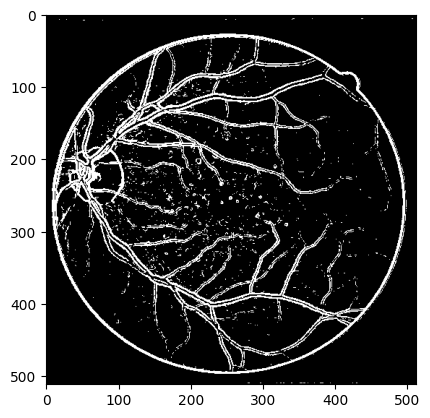

In [46]:
def erode(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    eroded_image = cv2.erode(img, kernel, iterations=1)
    return eroded_image

plt.imshow(erode(binary_images[0]),cmap='gray')

In [47]:
final_images=[erode_dilate(image) for image in binary_images]

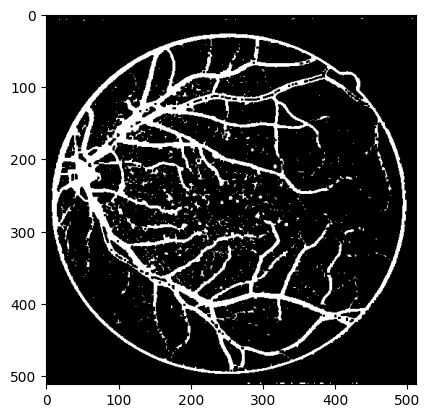

In [48]:
plt.imshow(final_images[0],cmap='gray')

In [49]:
output_path ='output'

In [50]:


#saving output
for i in range(len(final_images)):
    cv2.imwrite(f'output/{i}.jpg',final_images[i])